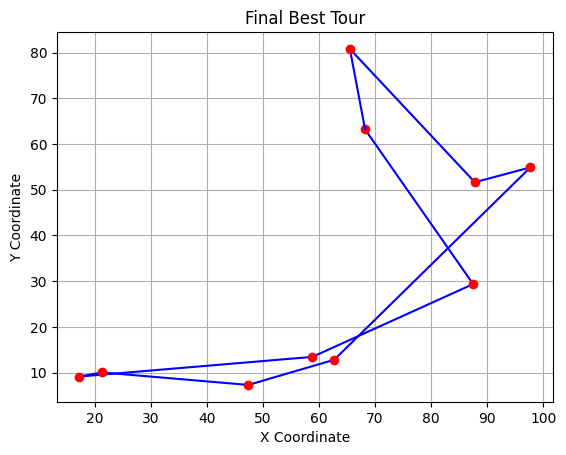

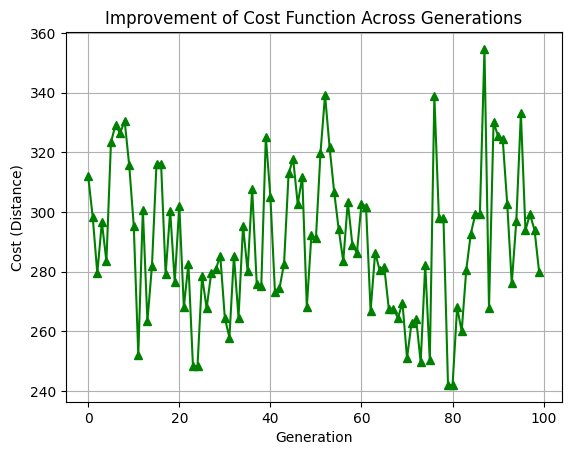

Best route: [6, 2, 7, 8, 3, 5, 0, 9, 1, 4]


In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_initial_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

def calculate_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i]][tour[i+1]] for i in range(len(tour)-1)) + distance_matrix[tour[-1]][tour[0]]

def fitness(tour, distance_matrix):
    return 1 / calculate_distance(tour, distance_matrix)

def select_parents(population, fitnesses, num_parents):
    return random.choices(population, weights=fitnesses, k=num_parents)

def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None]*len(parent1)
    child[start:end] = parent1[start:end]
    pointer = 0
    for x in parent2:
        if None in child:
            if x not in child:
                while child[pointer] is not None:
                    pointer += 1
                child[pointer] = x
    return child

def mutate(tour, mutation_rate):
    for i in range(len(tour)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(tour)-1)
            tour[i], tour[j] = tour[j], tour[i]
    return tour

def plot_tour(tour, coordinates, title='Final Best Tour'):
    plt.figure()
    for i in range(len(tour)):
        start = coordinates[tour[i]]
        end = coordinates[tour[(i + 1) % len(tour)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
        plt.plot(start[0], start[1], 'ro')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

def plot_cost(costs):
    plt.figure()
    plt.plot(costs, 'g^-')
    plt.title('Improvement of Cost Function Across Generations')
    plt.xlabel('Generation')
    plt.ylabel('Cost (Distance)')
    plt.grid(True)
    plt.show()

def genetic_algorithm(num_cities, population_size, generations, mutation_rate):
    coordinates = np.random.rand(num_cities, 2) * 100  # Generate random coordinates
    distance_matrix = np.linalg.norm([coordinates[i] - coordinates[j] for i in range(num_cities) for j in range(num_cities)], axis=1).reshape(num_cities, num_cities)
    np.fill_diagonal(distance_matrix, 0)
    population = generate_initial_population(population_size, num_cities)
    costs = []

    for generation in range(generations):
        fit_scores = [fitness(tour, distance_matrix) for tour in population]
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fit_scores, 2)
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])
        population = new_population

        best_tour = population[np.argmin([calculate_distance(t, distance_matrix) for t in population])]
        best_distance = calculate_distance(best_tour, distance_matrix)
        costs.append(best_distance)

    plot_tour(best_tour, coordinates)
    plot_cost(costs)

    return best_tour

# Parameters
NUM_CITIES = 10
POPULATION_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = 0.01

# Run GA
best_route = genetic_algorithm(NUM_CITIES, POPULATION_SIZE, GENERATIONS, MUTATION_RATE)
print("Best route:", best_route)


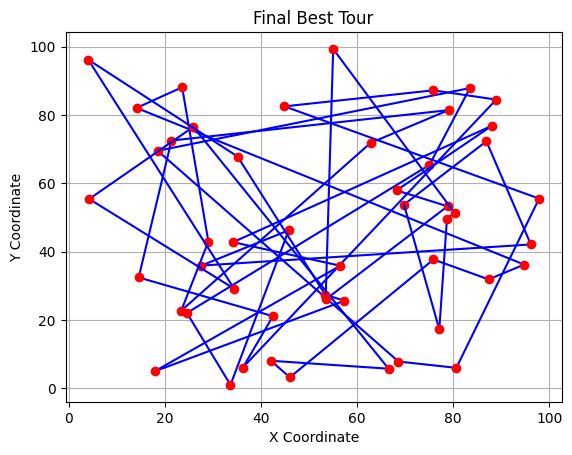

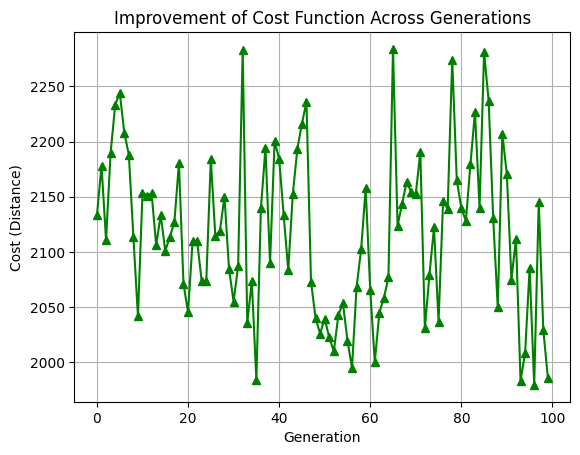

Best route: [17, 6, 0, 19, 38, 26, 29, 33, 48, 24, 32, 12, 27, 43, 36, 41, 2, 47, 37, 44, 5, 23, 1, 9, 46, 14, 15, 45, 40, 42, 35, 10, 11, 3, 31, 7, 20, 22, 28, 25, 4, 21, 49, 8, 13, 16, 18, 34, 39, 30]


In [7]:
# Parameters
NUM_CITIES = 50
POPULATION_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = 0.01

# Run GA
best_route = genetic_algorithm(NUM_CITIES, POPULATION_SIZE, GENERATIONS, MUTATION_RATE)
print("Best route:", best_route)